In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [50]:
db = pd.read_csv('db_files/db_cleaned.csv')

In [51]:
db.shape

(558172, 21)

In [52]:
db.head(20)

,Unnamed: 0,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,ordering,pnconst,pcategory,region,types,nconst,primaryName,birthYear,deathYear,primaryProfession
0,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0179321,Noreen Corcoran,1943,2016,"actress,soundtrack"
1,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0228072,Françoise Diot,1914,2013,"editor,editorial_department,sound_department"
2,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0755977,Maksim Sagalovich,1915,1997,writer
3,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0790590,Haleigh Sheehan,1983,2024,actress
4,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,10,nm0107463,editor,IT,imdbDisplay,nm0866390,Peter Tomarken,1942,2006,"actor,producer,writer"
5,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0179321,Noreen Corcoran,1943,2016,"actress,soundtrack"
6,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0228072,Françoise Diot,1914,2013,"editor,editorial_department,sound_department"
7,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0755977,Maksim Sagalovich,1915,1997,writer
8,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0790590,Haleigh Sheehan,1983,2024,actress
9,34803,tt0035423,Kate & Leopold,Kate & Leopold,0,2001,2001,118,"Comedy,Fantasy,Romance",6.4,...,2,nm0413168,actor,EG,imdbDisplay,nm0866390,Peter Tomarken,1942,2006,"actor,producer,writer"


# FAVOURITE GENRE PER DECADE

In [69]:
db2 = pd.read_csv('db_files/movies_db_cleaned.csv')
db2.head()

,Unnamed: 0,tconst,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,15788,tt0016029,The Little Colonel,The Little Colonel,0,1935,1935,81,"Comedy,Family,Music",7.0,1772.0
1,17704,tt0017961,Happiness,Schaste,0,1935,1935,95,"Comedy,Drama",7.3,1152.0
2,19121,tt0019403,Salt for Svanetia,Jim Shvante (marili svanets),0,1930,1930,55,Documentary,7.5,824.0
3,19864,tt0020163,People on Sunday,Menschen am Sonntag,0,1930,1930,73,"Comedy,Drama,Romance",7.3,3310.0
4,19994,tt0020298,Queen Kelly,Queen Kelly,0,1932,1932,101,Drama,7.1,3296.0


In [70]:
db2 = db2[db2.startYear <= 2020 ]

In [71]:
Comedy_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Comedy')].count())
Drama_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Drama')].count())
Action_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Action')].count())
Scifi_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Sci-Fi')].count())
Horror_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Horror')].count())
Western_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Western')].count())
Romance_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Romance')].count())
Thriller_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Thriller')].count())
Musical_db = db2.groupby(['startYear'])['genres'].apply(lambda x: x[x.str.contains('Musical')].count())

Text(0.5, 1.0, 'Musical')

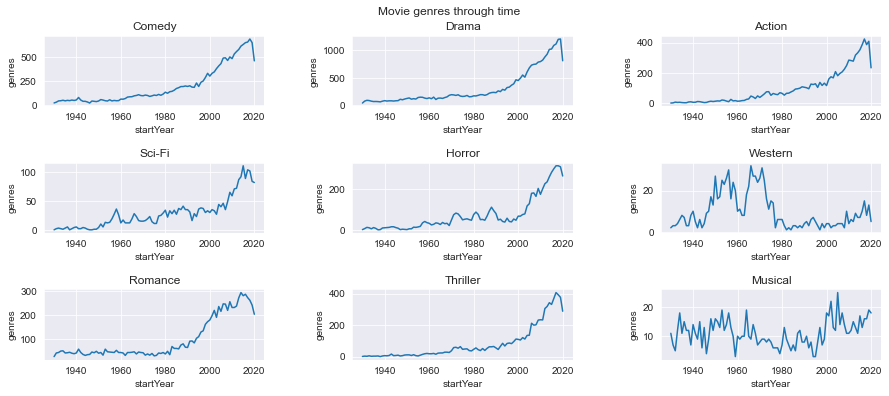

In [72]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.pyplot.subplots(3, 3, figsize=(15, 5))
fig.suptitle('Movie genres through time')
plt.pyplot.subplots_adjust(left=0.125, bottom=0, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

sns.lineplot(ax=ax1,data=Comedy_db);
ax1.set_title('Comedy')
sns.lineplot(ax=ax2,data=Drama_db);
ax2.set_title('Drama')
sns.lineplot(ax=ax3,data=Action_db);
ax3.set_title('Action')
sns.lineplot(ax=ax4,data=Scifi_db);
ax4.set_title('Sci-Fi')
sns.lineplot(ax=ax5,data=Horror_db);
ax5.set_title('Horror')
sns.lineplot(ax=ax6,data=Western_db);
ax6.set_title('Western')
sns.lineplot(ax=ax7,data=Romance_db);
ax7.set_title('Romance')
sns.lineplot(ax=ax8,data=Thriller_db);
ax8.set_title('Thriller')
sns.lineplot(ax=ax9,data=Musical_db);
ax9.set_title('Musical')